# Fake News Prediction

### Problem Statement 

Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.

The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed.

### Data Description

You can find many datasets for fake news detection on Kaggle or many other sites. I download these datasets from Kaggle. There are two datasets one for fake news and one for true news. In true news, there is 21417 news, and in fake news, there is 23481 news. You have to insert one label column zero for fake news and one for true news. We are combined both datasets using pandas built-in function.

# Importing required libraries

In [2]:
#Basic libraries
import pandas as pd
import numpy as np

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

#Metrics libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, log_loss

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [4]:
#Loading the data
import io

from google.colab import files
uploaded = files.upload()
df_True = pd.read_csv(io.BytesIO(uploaded['True.csv']))
print(df_True)

Saving True.csv to True.csv
                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) -

In [5]:
#Loading the data
uploaded = files.upload()
df_Fake = pd.read_csv(io.BytesIO(uploaded['Fake.csv']))
print(df_Fake)

Saving Fake.csv to Fake.csv
                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was reveale

In [6]:
df_true=df_True

In [7]:
df_fake=df_Fake

## Combining the data and preparing for EDA and NLP

In [8]:
print("Real news count:", df_true.shape[0])
print("Fake news count:", df_fake.shape[0])

print("Null count in real news:", df_true.isna().sum().sum())
print("Null count in fake news:", df_fake.isna().sum().sum())

Real news count: 21417
Fake news count: 23481
Null count in real news: 0
Null count in fake news: 0


In [9]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [10]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [14]:
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   target   21417 non-null  object
dtypes: object(5)
memory usage: 836.7+ KB


In [15]:
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   target   23481 non-null  object
dtypes: object(5)
memory usage: 917.4+ KB


In [16]:
data

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true


In [17]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['lable']= label_encoder.fit_transform(data['target'])

data['lable'].unique()

array([0, 1])

In [12]:
# Add flag to track fake and real
df_fake['target'] = 'fake'
df_true['target'] = 'true'

In [18]:
data

,title,text,subject,date,target,lable
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake,0
...,...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true,1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true,1


In [13]:
# Concatenate dataframes
data = pd.concat([df_fake, df_true]).reset_index(drop = True)
data.shape

(44898, 5)

In [19]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [20]:
# Check the data
data.head()

,title,text,subject,date,target,lable
0,U.S. calls for U.N. to impose strongest measur...,UNITED NATIONS (Reuters) - U.S. Ambassador to ...,worldnews,"September 4, 2017",true,1
1,WATCH: Donald Trump Calls For Hillary Clinton...,Donald Trump told his supporters to engage in ...,News,"August 9, 2016",fake,0
2,Disney CEO says staying on Trump advisory council,LOS ANGELES (Reuters) - Walt Disney Co (DIS.N)...,politicsNews,"March 8, 2017",true,1
3,U.S. theory on Democratic Party breach: Hacker...,WASHINGTON (Reuters) - Some U.S. intelligence ...,politicsNews,"July 28, 2016",true,1
4,‘One for the Ages’ Full Video and Transcript o...,A speech for the ages was given today by Presi...,politics,"Sep 19, 2017",fake,0


In [21]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target,lable
0,U.S. calls for U.N. to impose strongest measur...,UNITED NATIONS (Reuters) - U.S. Ambassador to ...,worldnews,true,1
1,WATCH: Donald Trump Calls For Hillary Clinton...,Donald Trump told his supporters to engage in ...,News,fake,0
2,Disney CEO says staying on Trump advisory council,LOS ANGELES (Reuters) - Walt Disney Co (DIS.N)...,politicsNews,true,1
3,U.S. theory on Democratic Party breach: Hacker...,WASHINGTON (Reuters) - Some U.S. intelligence ...,politicsNews,true,1
4,‘One for the Ages’ Full Video and Transcript o...,A speech for the ages was given today by Presi...,politics,fake,0


In [22]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target,lable
0,UNITED NATIONS (Reuters) - U.S. Ambassador to ...,worldnews,true,1
1,Donald Trump told his supporters to engage in ...,News,fake,0
2,LOS ANGELES (Reuters) - Walt Disney Co (DIS.N)...,politicsNews,true,1
3,WASHINGTON (Reuters) - Some U.S. intelligence ...,politicsNews,true,1
4,A speech for the ages was given today by Presi...,politics,fake,0


In [23]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target,lable
0,united nations (reuters) - u.s. ambassador to ...,worldnews,true,1
1,donald trump told his supporters to engage in ...,News,fake,0
2,los angeles (reuters) - walt disney co (dis.n)...,politicsNews,true,1
3,washington (reuters) - some u.s. intelligence ...,politicsNews,true,1
4,a speech for the ages was given today by presi...,politics,fake,0


In [24]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [25]:
# Check
data.head()

,text,subject,target,lable
0,united nations reuters us ambassador to the u...,worldnews,true,1
1,donald trump told his supporters to engage in ...,News,fake,0
2,los angeles reuters walt disney co disn chief...,politicsNews,true,1
3,washington reuters some us intelligence offic...,politicsNews,true,1
4,a speech for the ages was given today by presi...,politics,fake,0


In [26]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
data.head()

,text,subject,target,lable
0,united nations reuters us ambassador united na...,worldnews,true,1
1,donald trump told supporters engage gun violen...,News,fake,0
2,los angeles reuters walt disney co disn chief ...,politicsNews,true,1
3,washington reuters us intelligence officials s...,politicsNews,true,1
4,speech ages given today president donald trump...,politics,fake,0


# EDA

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


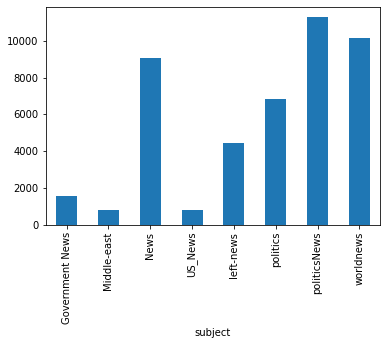

In [28]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


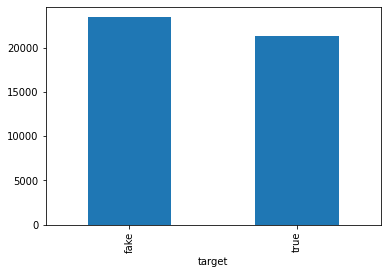

In [29]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

We can see that the data is balanced well, as equal weightage of 0's and 1's are given to the label column so that there is no need to handle the dataset by applying sampling techniques

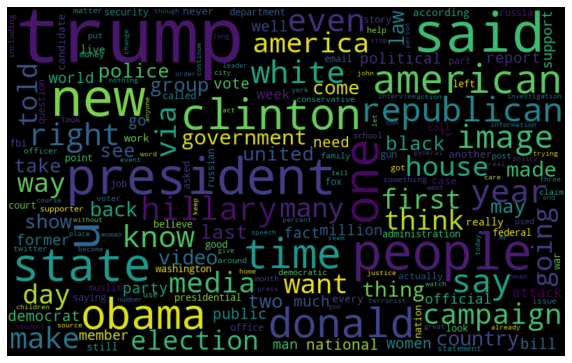

In [30]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

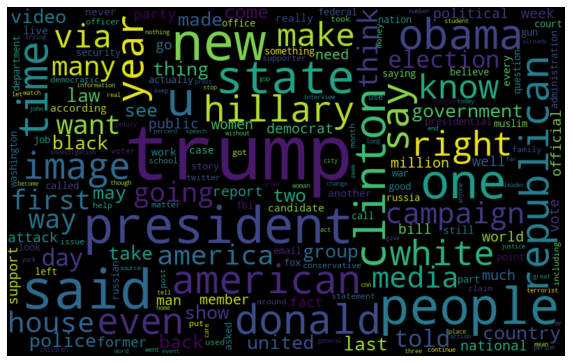

In [31]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

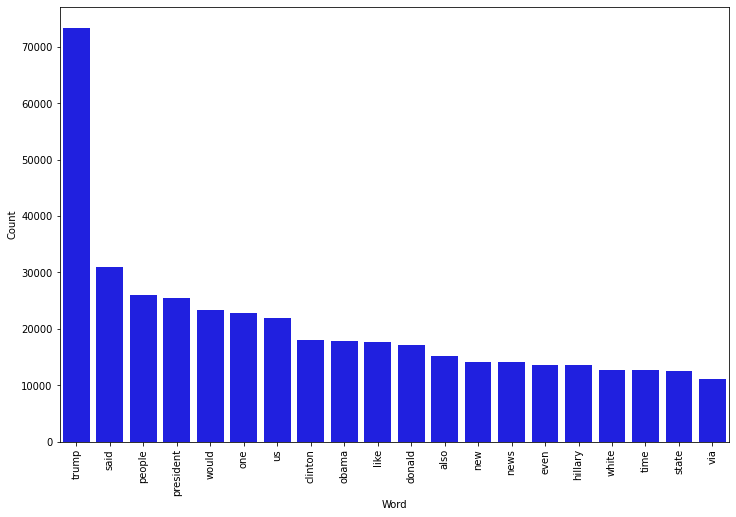

In [33]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

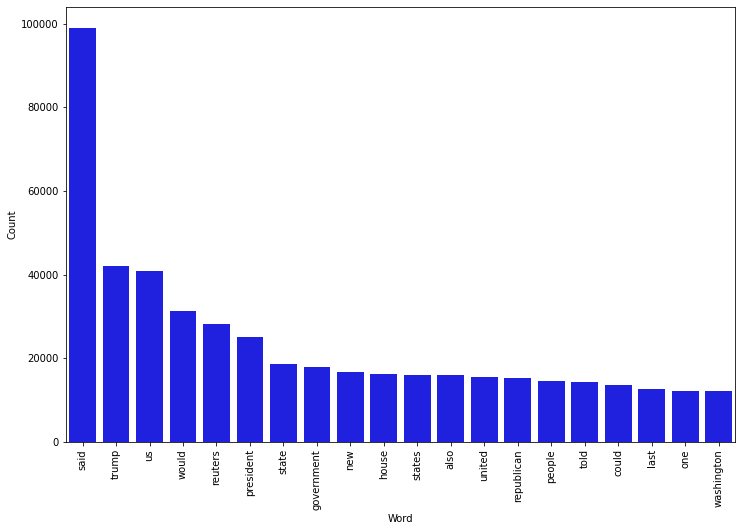

In [34]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [35]:
df=data

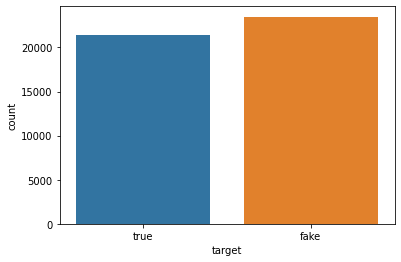

In [36]:
#Plotting the countplot for label
sns.countplot(df['target'])

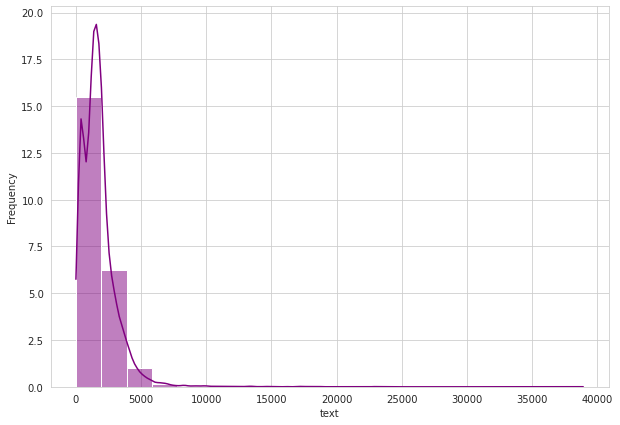

In [37]:
#Checking the distribution of headline length using histplot
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
headline_len = df.text.str.len()
sns.histplot(headline_len, bins = 20, color = 'purple', stat = 'frequency', kde = True)

Majority of the news are of length below 1000, where maximum length is above 140000.

In [38]:
df

,text,subject,target,lable
0,united nations reuters us ambassador united na...,worldnews,true,1
1,donald trump told supporters engage gun violen...,News,fake,0
2,los angeles reuters walt disney co disn chief ...,politicsNews,true,1
3,washington reuters us intelligence officials s...,politicsNews,true,1
4,speech ages given today president donald trump...,politics,fake,0
...,...,...,...,...
44893,tamara holder guest joy reid msnbc show mornin...,politics,fake,0
44894,washington reuters us bars offering 5 russian ...,politicsNews,true,1
44895,washington reuters us president barack obama m...,politicsNews,true,1
44896,protestors peacefully shut main road leading t...,News,fake,0


In [39]:
#Checking the statistical summary of the dataset
df.describe()

,lable
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


# Data Pre-Proccessing

Dropping unnecessary columns

In [40]:
df.drop(['target'], axis=1, inplace=True)
#Checking the dataset after dropping
df.head()

,text,subject,lable
0,united nations reuters us ambassador united na...,worldnews,1
1,donald trump told supporters engage gun violen...,News,0
2,los angeles reuters walt disney co disn chief ...,politicsNews,1
3,washington reuters us intelligence officials s...,politicsNews,1
4,speech ages given today president donald trump...,politics,0


Adding new features

In [41]:
#Creating new columns for printing the length of headline, author and news
df['length_text'] = df.text.str.len()
df['length_subject'] = df.subject.str.len()
df.head()

,text,subject,lable,length_text,length_subject
0,united nations reuters us ambassador united na...,worldnews,1,490,9
1,donald trump told supporters engage gun violen...,News,0,1438,4
2,los angeles reuters walt disney co disn chief ...,politicsNews,1,1796,12
3,washington reuters us intelligence officials s...,politicsNews,1,3772,12
4,speech ages given today president donald trump...,politics,0,18590,8


# Preprocessing using NLP

In [42]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [43]:
#Cleaning the data using regex operations 
#Function Definition
def clean_text(text):
    
    #Converting the text to lower case
    lowered_text = text.lower()
        
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing extra newline
    text = text.strip("\n")
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [49]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [50]:
#Applying the above custom function to the required features
df['text'] = df['text'].apply(lambda x: clean_text(x))
df['subject'] = df['subject'].apply(lambda x: clean_text(x))

In [51]:
#Creating new features for checking the length after cleaning of these columns
df['text_after_cleaning'] = df['text'].map(lambda x: len(x))
df['subject_after_cleaning'] = df['subject'].map(lambda x: len(x))

In [52]:
df  #Checking the dataset after creating the features

,text,subject,lable,length_text,length_subject,text_after_cleaning,subject_after_cleaning
0,united nation reuters u ambassador united nati...,worldnews,1,490,9,475,9
1,donald trump told supporter engage gun violenc...,news,0,1438,4,1405,4
2,los angeles reuters walt disney co disn chief ...,politicsnews,1,1796,12,1696,12
3,washington reuters u intelligence official sus...,politicsnews,1,3772,12,3628,12
4,speech age given today president donald trump ...,politics,0,18590,8,18063,8
...,...,...,...,...,...,...,...
44893,tamara holder guest joy reid msnbc show mornin...,politics,0,734,8,725,8
44894,washington reuters u bar offering russian vodk...,politicsnews,1,1627,12,1502,12
44895,washington reuters u president barack obama me...,politicsnews,1,1868,12,1806,12
44896,protestors peacefully shut main road leading t...,news,0,2399,4,2261,4


We can see that the new length features are created and then added to the dataset. Now, we will calculate the total words removed in all the columns

In [53]:
#Checking the total length removed from the dataset for text column
print("Original Length:", df.length_text.sum(), '\n')
print("Cleaned Length:", df.text_after_cleaning.sum(), '\n')
print("Total Words Removed:", (df.length_text.sum()) - (df.text_after_cleaning.sum()))

Original Length: 78978643 

Cleaned Length: 76209467 

Total Words Removed: 2769176


In [54]:
#Checking the total length removed from the dataset for subject column
print("Original Length:", df.length_subject.sum(), '\n')
print("Cleaned Length:", df.subject_after_cleaning.sum(), '\n')
print("Total Words Removed:", (df.length_subject.sum()) - (df.subject_after_cleaning.sum()))

Original Length: 395217 

Cleaned Length: 394434 

Total Words Removed: 783


We can observe that more number of unwanted words were removed from the dataset and it was done by using regex operations and other NLP techniques.

Plotting features before and after cleaning the data

In [56]:
df.rename(columns={'lable': 'label'}, inplace=True)

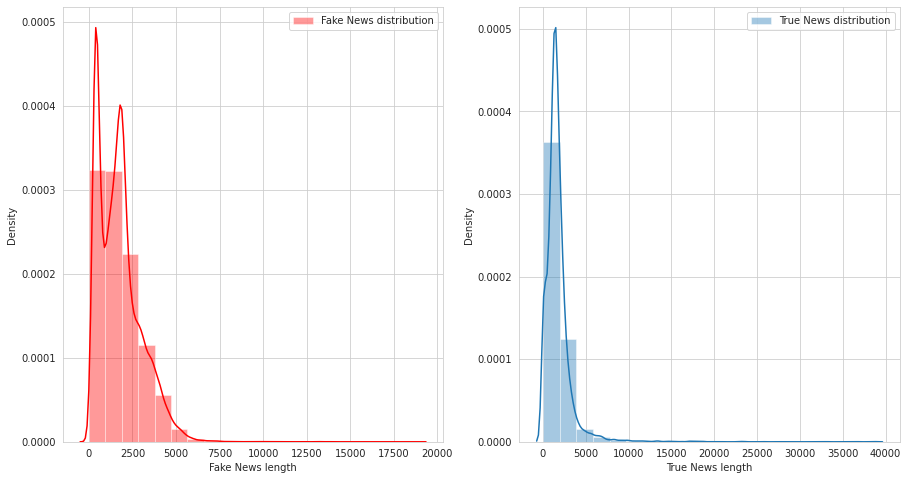

In [58]:
#News distribution before cleaning
f,ax=plt.subplots(1,2,figsize = (15,8))

#For fake news
sns.distplot(df[df['label']==1]['length_text'],bins=20,ax=ax[0],label='Fake News distribution',color='r')
ax[0].set_xlabel('Fake News length')
ax[0].legend()

#For true news
sns.distplot(df[df['label']==0]['length_text'],bins=20,ax=ax[1],label='True News distribution')
ax[1].set_xlabel('True News length')
ax[1].legend()

plt.show()

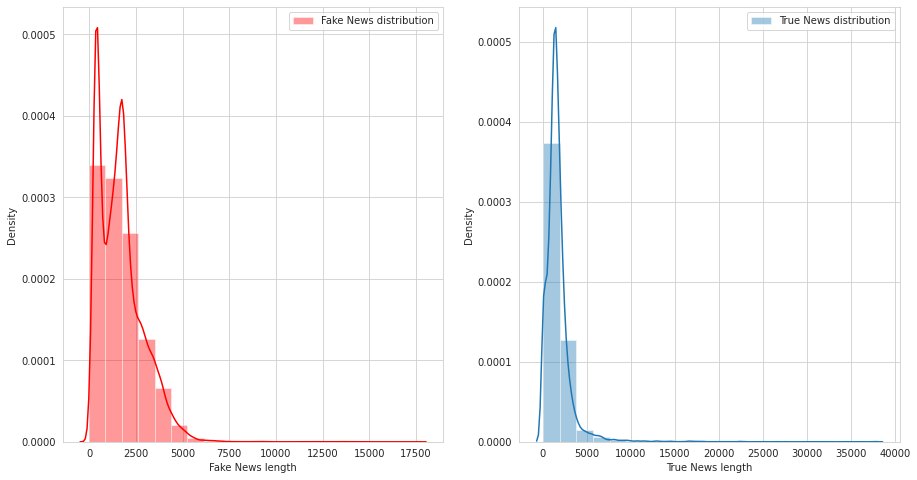

In [59]:
#News distribution AFTER cleaning
f,ax=plt.subplots(1,2,figsize = (15,8))

#For fake news
sns.distplot(df[df['label']==1]['text_after_cleaning'],bins=20,ax=ax[0],label='Fake News distribution',color='r')
ax[0].set_xlabel('Fake News length')
ax[0].legend()

#For true news
sns.distplot(df[df['label']==0]['text_after_cleaning'],bins=20,ax=ax[1],label='True News distribution')
ax[1].set_xlabel('True News length')
ax[1].legend()

plt.show()

# Plotting Wordcloud for all 3 features

### For Fake data

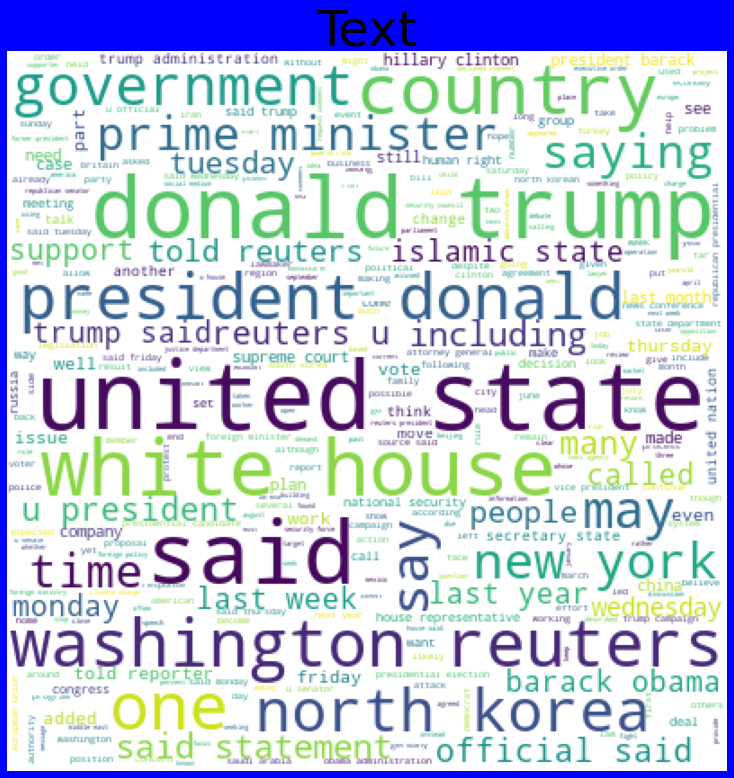

In [60]:
#Plotting for headlines
fake = df['text'][df['label']==1]
wordcloud=WordCloud(height=400,width=400,background_color='white',max_words=400).generate(' '.join(fake))
plt.figure(figsize=(10,10),facecolor='b')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Text',fontdict={'fontsize':50, 'fontweight':50, 'color':'black'})
plt.show()

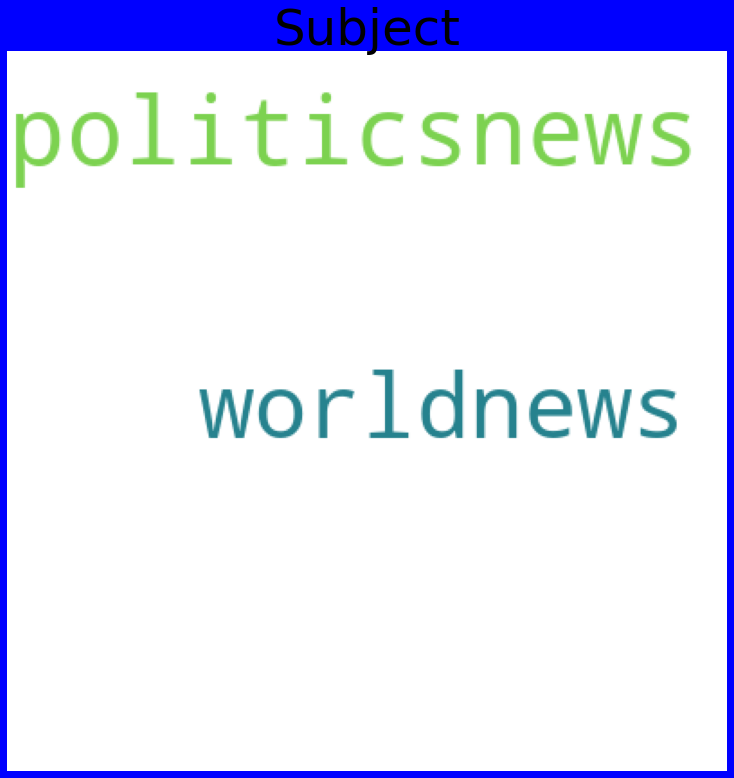

In [61]:
#Plotting for subject
fake = df['subject'][df['label']==1]
wordcloud=WordCloud(height=400,width=400,background_color='white',max_words=400).generate(' '.join(fake))
plt.figure(figsize=(10,10),facecolor='b')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Subject',fontdict={'fontsize':50, 'fontweight':50, 'color':'black'})
plt.show()

### For True data

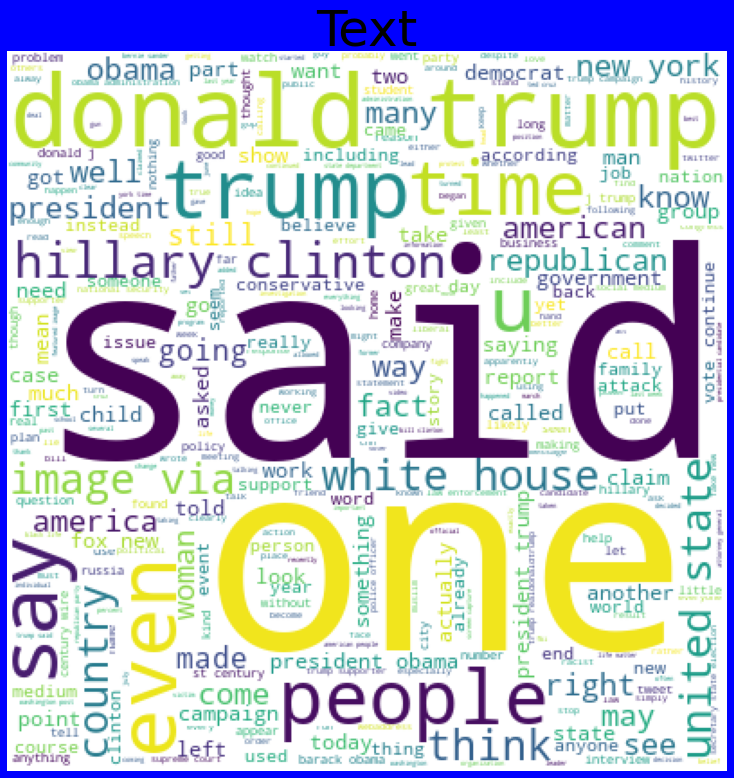

In [62]:
#Plotting for headlines
true_data = df['text'][df['label']==0]
wordcloud=WordCloud(height=400,width=400,background_color='white',max_words=400).generate(' '.join(true_data))
plt.figure(figsize=(10,10),facecolor='b')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Text',fontdict={'fontsize':50, 'fontweight':50, 'color':'black'})
plt.show()

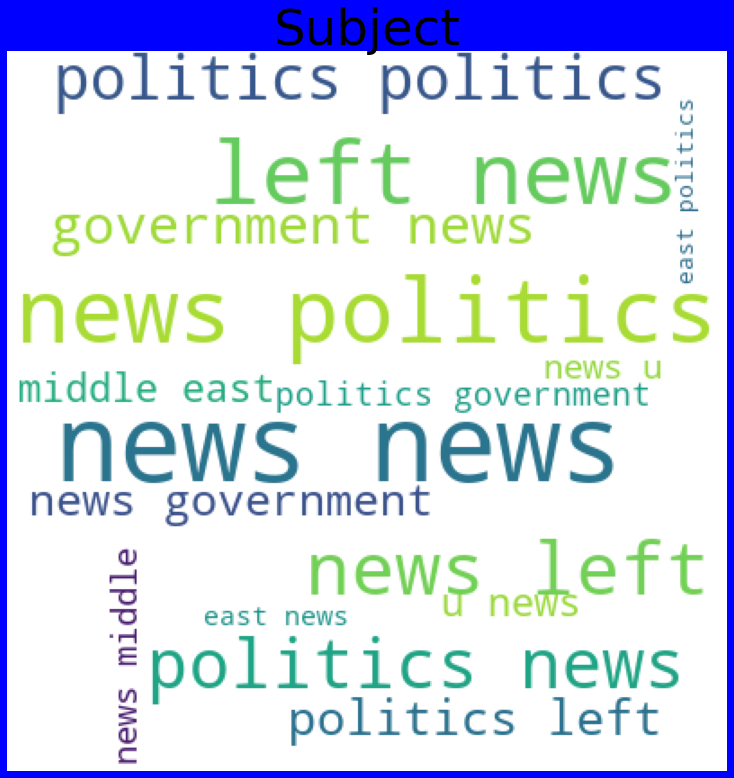

In [63]:
#Plotting for subject
true_data = df['subject'][df['label']==0]
wordcloud=WordCloud(height=400,width=400,background_color='white',max_words=400).generate(' '.join(true_data))
plt.figure(figsize=(10,10),facecolor='b')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='Subject',fontdict={'fontsize':50, 'fontweight':50, 'color':'black'})
plt.show()

From the above wordclouds, we can see that the large texts have more weightage in their respective type of comments whereas small texts have the lesser weightages

## Separating independent and dependent variables

In [65]:
#Before separating features, we need to convert the object data into number vectors and it can be done by using TF-IDF vectorizer
tf_vec = TfidfVectorizer(max_features=15000)
features = tf_vec.fit_transform(df['text'] + df['subject'])
#We are adding these features as we need to convert all of them together

In [67]:
#Let's Separate the input and output variables represented by X and y respectively
X=features
y=df['label']

In [68]:
print(X.shape,'\t\t', y.shape)    #Checking the shape of the data

(44898, 15000) 		 (44898,)


In [69]:
X  #Checking out X data

<44898x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 6478465 stored elements in Compressed Sparse Row format>

In [70]:
y #Checking out y data

0        1
1        0
2        1
3        1
4        0
        ..
44893    0
44894    1
44895    1
44896    0
44897    0
Name: label, Length: 44898, dtype: int64

Now that we have separated independent and dependent features, we need to do the model building process from the data we have

# Model Building

In [71]:
#Initializing the instance of the model
LR=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [72]:
models= []
models.append(('Logistic Regression',LR))
models.append(('MultinomialNB',mnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

In [73]:
#Splitting the data using train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.9867112100965107


cross_val_score:  0.9869036115201741


roc_auc_score:  0.9867480593074538


Log_loss : 0.45898441980954824


Classification report:
 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7045
           1       0.98      0.99      0.99      6425

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Confusion matrix: 

[[6946   99]
 [  80 6345]]




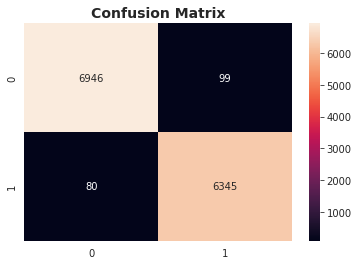

AUC_ROC curve:



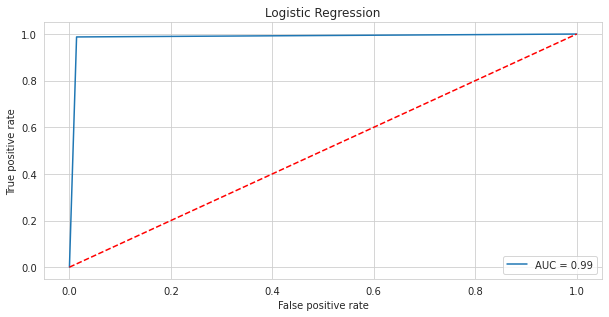





****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.9369710467706014


cross_val_score:  0.9364781446240189


roc_auc_score:  0.9366077992228945


Log_loss : 2.176966132284661


Classification report:
 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7045
           1       0.94      0.93      0.93      6425

    accuracy                           0.94     13470
   macro avg       0.94      0.94      0.94     13470
weighted avg       0.94      0.94      0.94     13470



Confusion matrix: 

[[6654  391]
 [ 458 5967]]




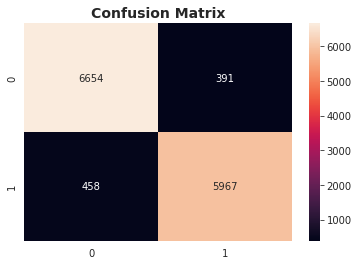

AUC_ROC curve:



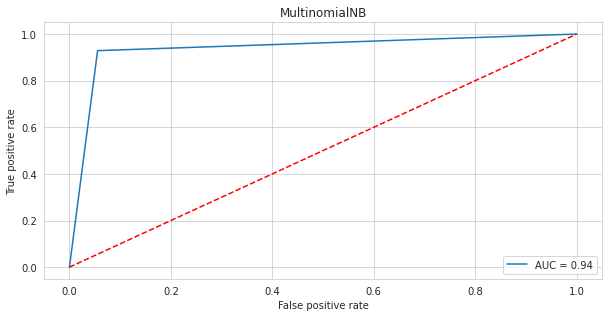





****************************** DecisionTreeClassifier ***************************


DecisionTreeClassifier()


accuracy_score:  0.9965107646622123


cross_val_score:  0.99650315472554


roc_auc_score:  0.9964930836506837


Log_loss : 0.12051522507084482


Classification report:
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7045
           1       1.00      1.00      1.00      6425

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



Confusion matrix: 

[[7023   22]
 [  25 6400]]




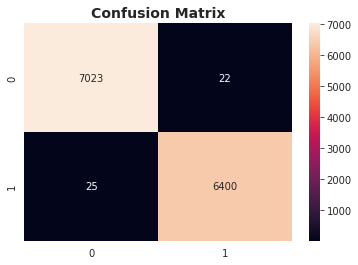

AUC_ROC curve:



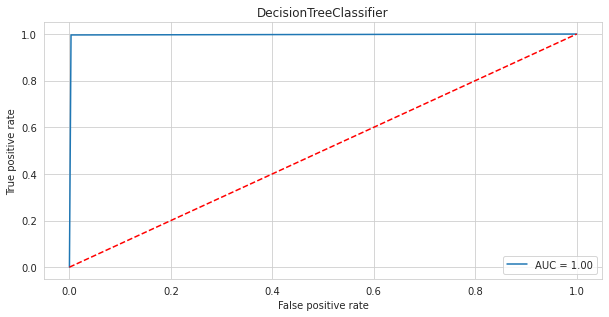





****************************** KNeighborsClassifier ***************************


KNeighborsClassifier()


accuracy_score:  0.6864884929472903


cross_val_score:  0.6984499318007794


roc_auc_score:  0.6724165660995326


Log_loss : 10.828312980973427


Classification report:
 
              precision    recall  f1-score   support

           0       0.63      0.98      0.77      7045
           1       0.94      0.37      0.53      6425

    accuracy                           0.69     13470
   macro avg       0.78      0.67      0.65     13470
weighted avg       0.78      0.69      0.65     13470



Confusion matrix: 

[[6891  154]
 [4069 2356]]




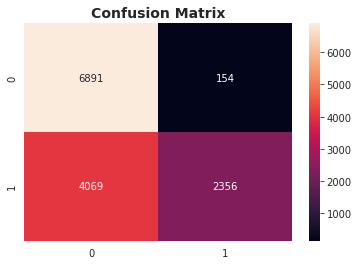

AUC_ROC curve:



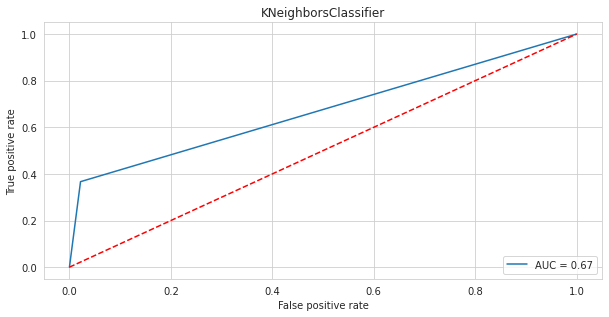





****************************** RandomForestClassifier ***************************


RandomForestClassifier()


accuracy_score:  0.9955456570155902


cross_val_score:  0.996213652196625


roc_auc_score:  0.9955772921712284


Log_loss : 0.15384969333349227


Classification report:
 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7045
           1       0.99      1.00      1.00      6425

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



Confusion matrix: 

[[7009   36]
 [  24 6401]]




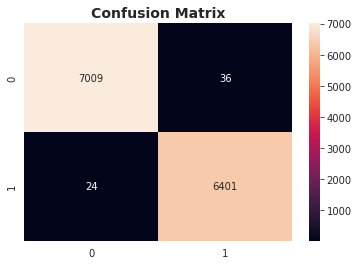

AUC_ROC curve:



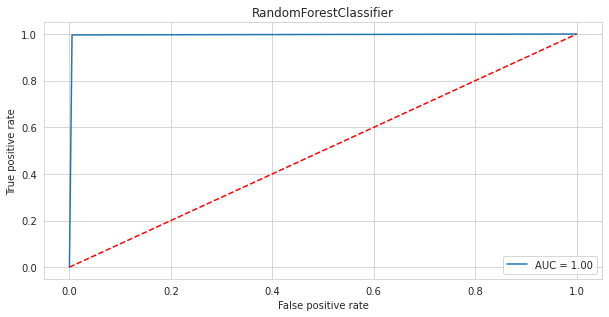





****************************** AdaBoostClassifier ***************************


AdaBoostClassifier()


accuracy_score:  0.9957683741648107


cross_val_score:  0.9961690814821319


roc_auc_score:  0.995817603897126


Log_loss : 0.14615737487860722


Classification report:
 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7045
           1       0.99      1.00      1.00      6425

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



Confusion matrix: 

[[7008   37]
 [  20 6405]]




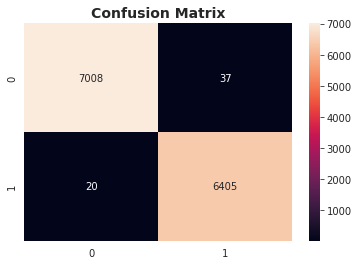

AUC_ROC curve:



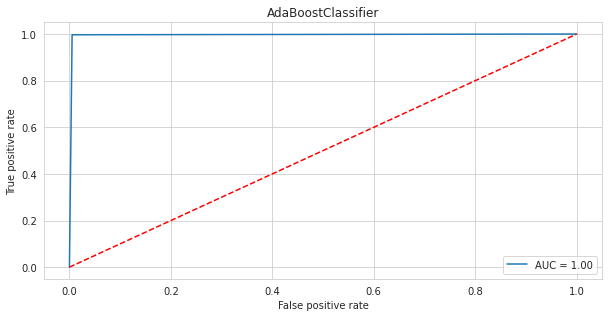





****************************** GradientBoostingClassifier ***************************


GradientBoostingClassifier()


accuracy_score:  0.9956941351150705


cross_val_score:  0.9955677104533196


roc_auc_score:  0.9957329341945745


Log_loss : 0.14872144145599997


Classification report:
 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7045
           1       0.99      1.00      1.00      6425

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



Confusion matrix: 

[[7009   36]
 [  22 6403]]




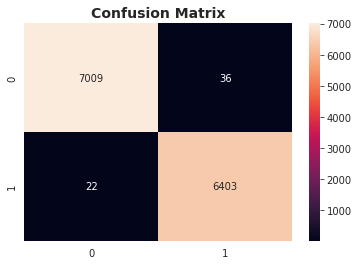

AUC_ROC curve:



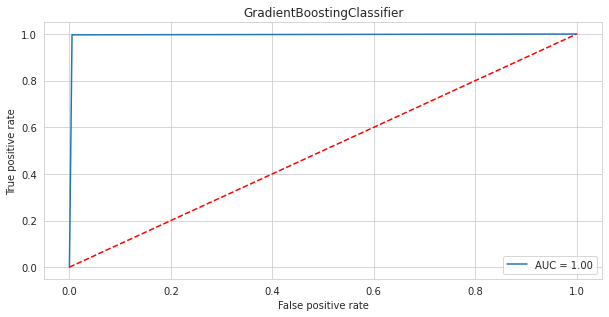

In [74]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
l_loss=[]
precision=[]
recall=[]
f1score=[]    #Empty lists

for name,model in models:
    #Fitting the model 
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    print(model)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    print('\n')
    
    #Accuracy score
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    
    #Cross-validation score
    sc=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    
    #Calculating roc_auc score
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    #Calculating log loss
    try: 
        loss=log_loss(y_test, pre)
    except:
        loss=log_loss(y_test, pre.toarray())   
    print("Log_loss :", loss)
    l_loss.append(loss)
    print('\n')
    
    #Calculating classification report
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    
    #Appending precision, recall and f1_score to the list
    precision.append(precision_score(y_test,pre))
    recall.append(recall_score(y_test,pre))
    f1score.append(f1_score(y_test,pre))
    print('\n')
    
    #Calculating confusion matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    
    #Plotting the confusion matrix using heatmap
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix', size=14, weight='bold', loc='center')
    plt.show()
    
    #Plotting AUC_ROC curve
    plt.figure(figsize=(10,50))
    plt.subplot(912)
    print('AUC_ROC curve:\n')
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
    print('\n\n\n')

In [75]:
#Printing the results in a dataFrame
results = pd.DataFrame({"Model" : Model,
                        'accuracy_score' : score,
                        'cross_validation_score' : cvs,
                        'log_loss': l_loss,
                        'AUC_ROC Score' : rocscore,
                        'Precision' : precision,
                        'Recall' : recall,
                        'f1_score' : f1score
                        })
results

,Model,accuracy_score,cross_validation_score,log_loss,AUC_ROC Score,Precision,Recall,f1_score
0,Logistic Regression,98.671121,98.690361,0.458984,98.674806,0.984637,0.987549,0.986091
1,MultinomialNB,93.697105,93.647814,2.176966,93.660780,0.938503,0.928716,0.933584
2,DecisionTreeClassifier,99.651076,99.650315,0.120515,99.649308,0.996574,0.996109,0.996342
3,KNeighborsClassifier,68.648849,69.844993,10.828313,67.241657,0.938645,0.366693,0.527364
4,RandomForestClassifier,99.554566,99.621365,0.153850,99.557729,0.994407,0.996265,0.995335
5,AdaBoostClassifier,99.576837,99.616908,0.146157,99.581760,0.994256,0.996887,0.995570
6,GradientBoostingClassifier,99.569414,99.556771,0.148721,99.573293,0.994409,0.996576,0.995491


After running the algorithms and according to the scores of performance metrics and other scores, we can see that Decision Tree Classifier algorithms are performing well. Now, we will perform Hyperparameter Tuning to find out the best parameters and try to increase the scores.

# Hyper-Parameter Tunning

# DecisionTreeClassifier

In [77]:
#Parameters list to pass in Discision Tree Classifier
param_grid = {'max_depth': [5, 10, 15, 20],
              'min_samples_leaf': [1, 2, 3, 4]}

In [78]:
#Using GridSearchCV to run the parameters and checking final accuracy
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)  #Printing the best parameters obtained
print(grid_search.best_score_) #Mean cross-validated score of best_estimator

{'max_depth': 20, 'min_samples_leaf': 2}
0.9964999059672452


In [79]:
#Using the best parameters obtained
clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy score: ',accuracy_score(y_test,pre)*100)
print('Cross validation score: ',cross_val_score(clf,X,y,cv=5,scoring='accuracy').mean()*100)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
roc_auc= auc(false_positive_rate,true_positive_rate)
print('roc_auc_score: ',roc_auc)
loss = log_loss(y_test, pre)
print("Log loss:", loss)
print('Classification report: \n')
print(classification_report(y_test,pre))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pre))

Accuracy score:  99.56941351150705
Cross validation score:  99.64140505028934
roc_auc_score:  0.9957329341945745
Log loss: 0.14872144145599997
Classification report: 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7045
           1       0.99      1.00      1.00      6425

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470

Confusion matrix: 

[[7009   36]
 [  22 6403]]


After hyperparameter Tuning we can see that DecisionTreeClassifier is performing well as the cross validation score is better . Therefore, we will consider DecisionTreeClassifier as our final best model.

# Finalizing the Model

In [80]:
clf_prediction=clf.predict(X)
print('Predictions of DecisionTreeClassifier : ',clf_prediction)

Predictions of DecisionTreeClassifier Classifier:  [1 0 1 ... 1 0 0]


In [81]:
#Saving the model
import joblib
joblib.dump(clf,'Fake_News_Classifier.pkl')

['Fake_News_Classifier.pkl']

In [82]:
pred_results=pd.DataFrame(clf_prediction)
pred_results.to_csv('FakeNews_Results.csv')

# Conclusion

After the completion of this project, we got an insight of how to preprocess the data, analyzing the data and building a model.

 First, we imported the 2 datasets True.csv and Fake.csv which had more than 20000 records each.

We did all the required pre-processing steps like checking null values, datatypes check, dropping unnecessary columns, etc.

We did the Exploratory Data Analysis using various plots and recorded the observations.

Using NLP, we pre-processed the comment text and did other steps like:
-Removing Punctuations and other special characters
-Splitting the comments into individual words
-Removing Stop Words
-Stemming and Lemmatising
-Applying Count Vectoriser
-Plotting wordcloud for knowing the weightage of words used

We created many new features like length of words before pre-processing and after pre-processing inorder to know the words cleaned after the necessary steps.

We applied Tf-idf Vectorizer for scaling the data into number vectors and for x feature we combined the written_by, news and headlines together.

Then, we split the data using train_test_split and then we started the model building process by running as many algorithms in a for loop, with difference metrics like cross_val_score, confusion matrix, auc_score, log loss, precision, recall, f1_score, etc.

We found that Decision Tree Classifier was performing well. The next step was to perform hyperparameter tuning technique to these models for finding out the best parameters and trying to improve our scores.

We finalized the model by predicting the outputs, saving the model and storing the results in a csv file.

### Problems faced while working in this project:


    1-More computational power was required.

    2-More missing data were present in the dataset.

    3-Loss was more for some algorithms.